In [1]:
from sklearn import svm
X = [[0], [1], [2], [3]]
Y = [0, 1, 2, 3]
clf = svm.SVC(decision_function_shape='ovo')
clf.fit(X, Y)

dec = clf.decision_function([[1]])
dec.shape[1] # 4 classes: 4*3/2 = 6

clf.decision_function_shape = "ovr"
dec = clf.decision_function([[1]])
dec.shape[1] # 4 classes


4

In [2]:
import numpy as np
X = np.array([[-1, -1], [-2, -1], [1, 1], [2, 1]])
y = np.array([1, 1, 2, 2])
from sklearn.svm import SVC
clf = SVC(gamma='auto')
clf.fit(X, y)

print(clf.predict([[-0.8, -1]]))

[1]


In [3]:
%matplotlib inline
#%matplotlib notebooks
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.ticker import LinearLocator, FormatStrFormatter
from mpl_toolkits.mplot3d import Axes3D

In [4]:
import mpld3
mpld3.enable_notebook()

In [5]:
import pandas as pd
import numpy as np
import scipy.fftpack

# DOWN

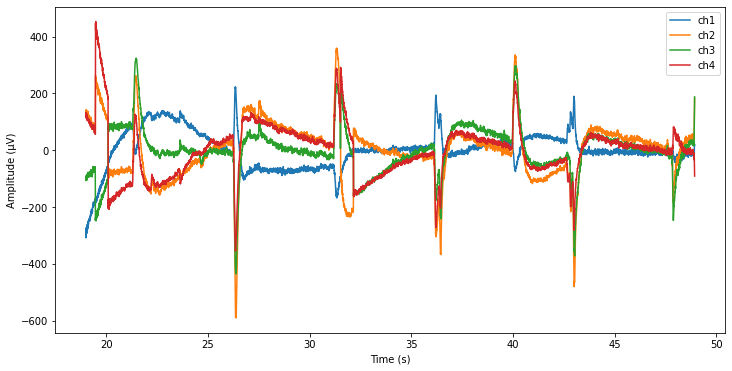

In [6]:
data = pd.read_csv('hands-free-drone-master/data/OpenBCISession_eye_movement_test_down/OpenBCI-RAW-2020-03-14_12-24-40.txt',
                   header = 6,
                   names = ['sampleIdx','ch1','ch2','ch3','ch4','accel1','accel2','accel3','timeFormatted','time'])
# at the moment, timeFormatted is not important and is not well formatted, 
# as well as sampleIdx and accelerometer data, so we can delete it.
data = data.drop(["sampleIdx","timeFormatted", "accel1", "accel2", "accel3"],axis=1)

# reorder dataframe
data = data[['time', 'ch1', 'ch2', 'ch3', 'ch4']]

# number of samples
N = len(data['time']) 

# sampling frequency (Hz)
fs = 200.0 

# sampling period (seconds)
T = 1.0 / fs 

#data.loc[0:1]
from datetime import datetime, timedelta

startTime = (data['time'].loc[0]).astype(np.float64)
stopTime = (startTime + N*T)
time = np.linspace(startTime, stopTime, N)
time = np.around(time, decimals=3)

startFromZero = True

if (startFromZero):
    time = time - round(startTime,3)
    time = np.around(time, decimals=3)
    data['time'] = time
    #timeFormatted = datetime.fromtimestamp(time / 1000).strftime('%H:%M:%S.%f')
    # rawData['timeFormatted'] = timeFormatted
else:
    data['time'] = time

# Print first 2 samples
#data.loc[0:1]
data = data[(data['time']>19) & (data['time']<54) ]
# Required input defintions are as follows;
# time:   Time between samples
# band:   The bandwidth around the centerline freqency that you wish to filter
# freq:   The centerline frequency to be filtered
# ripple: The maximum passband ripple that is allowed in db
# order:  The filter order.  For FIR notch filters this is best set to 2 or 3,
#         IIR filters are best suited for high values of order.  This algorithm
#         is hard coded to FIR filters
# filter_type: 'butter', 'bessel', 'cheby1', 'cheby2', 'ellip'
# data:         the data to be filtered
from scipy.signal import iirfilter, butter, lfilter
def notch_filter(time, band, freq, ripple, order, filter_type, data):
    from scipy.signal import iirfilter, lfilter
    fs   = 1/time
    nyq  = fs/2.0
    low  = freq - band/2.0
    high = freq + band/2.0
    low  = low/nyq
    high = high/nyq
    b, a = iirfilter(order, [low, high], rp=ripple, btype='bandstop',
                     analog=False, ftype=filter_type)
    filtered_data = lfilter(b, a, data)
    return filtered_data

def butter_bandpass(lowcut, highcut, fs, order=5):
    nyq = 0.5 * fs
    low = lowcut / nyq
    high = highcut / nyq
    b, a = butter(order, [low, high], btype='band')
    return b, a

def butter_bandpass_filter(data, lowcut, highcut, fs, order=5):

    b, a = butter_bandpass(lowcut, highcut, fs, order=order)
    y = lfilter(b, a, data)
    return y

#filtData = notch_filter(1/200.0, 1.0, 50.0, 0.5, 2.0, 'butter', data['ch3'])
filtData = pd.DataFrame()
filtData['time'] = data['time']
filtData['ch1'] = butter_bandpass_filter(data['ch1'],0.05,99,200)
filtData['ch1'] = notch_filter(1/200.0, 0.1, 50.0, 0.5, 2.0, 'butter', filtData['ch1'])
filtData['ch2'] = butter_bandpass_filter(data['ch2'],0.05,99,200)
filtData['ch2'] = notch_filter(1/200.0, 0.1, 50.0, 0.5, 2.0, 'butter', filtData['ch2'])
filtData['ch3'] = butter_bandpass_filter(data['ch3'],0.05,99,200)
filtData['ch3'] = notch_filter(1/200.0, 0.1, 50.0, 0.5, 2.0, 'butter', filtData['ch3'])
filtData['ch4'] = butter_bandpass_filter(data['ch4'],0.05,99,200)
filtData['ch4'] = notch_filter(1/200.0, 0.1, 50.0, 0.5, 2.0, 'butter', filtData['ch4'])

plt.figure(figsize=(12, 6))

#plt.subplot(2, 2, 1)
#plt.plot(data['time'], data['ch1'])
#plt.plot(data['time'], data['ch2'])
#plt.plot(data['time'], data['ch3']-200)
#plt.plot(data['time'], data['ch4']-200)


#plt.subplot(2, 2, 2)
plt.plot(filtData['time'], filtData['ch1'], label='ch1')
plt.plot(filtData['time'], filtData['ch2'], label='ch2')
plt.plot(filtData['time'], filtData['ch3'], label='ch3')
plt.plot(filtData['time'], filtData['ch4'], label='ch4')

#plt.plot(filtData['time'], filtData['ch2'])
#plt.subplot(4, 1, 3)
#plt.plot(filtData['time'], filtData['ch3'])
#plt.subplot(4, 1, 4)
#plt.plot(filtData['time'], filtData['ch4'])
ax = plt.gca()
ax.legend()
#ax.set_ylim(-75,75)
plt.ylabel('Amplitude (\u03BCV)')
plt.xlabel('Time (s)')
plt.show()

In [7]:
down = filtData

# UP

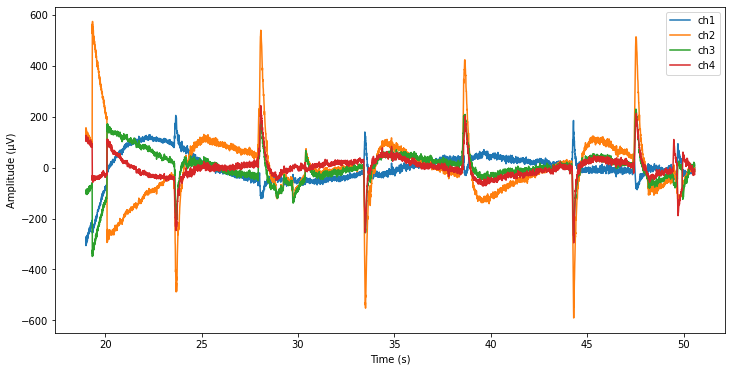

In [8]:
data = pd.read_csv('hands-free-drone-master/data/OpenBCISession_eye_movement_test_up/OpenBCI-RAW-2020-03-14_12-22-40.txt',
                   header = 6,
                   names = ['sampleIdx','ch1','ch2','ch3','ch4','accel1','accel2','accel3','timeFormatted','time'])
# at the moment, timeFormatted is not important and is not well formatted, 
# as well as sampleIdx and accelerometer data, so we can delete it.
data = data.drop(["sampleIdx","timeFormatted", "accel1", "accel2", "accel3"],axis=1)

# reorder dataframe
data = data[['time', 'ch1', 'ch2', 'ch3', 'ch4']]

# number of samples
N = len(data['time']) 

# sampling frequency (Hz)
fs = 200.0 

# sampling period (seconds)
T = 1.0 / fs 

#data.loc[0:1]
from datetime import datetime, timedelta

startTime = (data['time'].loc[0]).astype(np.float64)
stopTime = (startTime + N*T)
time = np.linspace(startTime, stopTime, N)
time = np.around(time, decimals=3)

startFromZero = True

if (startFromZero):
    time = time - round(startTime,3)
    time = np.around(time, decimals=3)
    data['time'] = time
    #timeFormatted = datetime.fromtimestamp(time / 1000).strftime('%H:%M:%S.%f')
    # rawData['timeFormatted'] = timeFormatted
else:
    data['time'] = time

# Print first 2 samples
#data.loc[0:1]
data = data[(data['time']>19) & (data['time']<54) ]
# Required input defintions are as follows;
# time:   Time between samples
# band:   The bandwidth around the centerline freqency that you wish to filter
# freq:   The centerline frequency to be filtered
# ripple: The maximum passband ripple that is allowed in db
# order:  The filter order.  For FIR notch filters this is best set to 2 or 3,
#         IIR filters are best suited for high values of order.  This algorithm
#         is hard coded to FIR filters
# filter_type: 'butter', 'bessel', 'cheby1', 'cheby2', 'ellip'
# data:         the data to be filtered
from scipy.signal import iirfilter, butter, lfilter
def notch_filter(time, band, freq, ripple, order, filter_type, data):
    from scipy.signal import iirfilter, lfilter
    fs   = 1/time
    nyq  = fs/2.0
    low  = freq - band/2.0
    high = freq + band/2.0
    low  = low/nyq
    high = high/nyq
    b, a = iirfilter(order, [low, high], rp=ripple, btype='bandstop',
                     analog=False, ftype=filter_type)
    filtered_data = lfilter(b, a, data)
    return filtered_data

def butter_bandpass(lowcut, highcut, fs, order=5):
    nyq = 0.5 * fs
    low = lowcut / nyq
    high = highcut / nyq
    b, a = butter(order, [low, high], btype='band')
    return b, a

def butter_bandpass_filter(data, lowcut, highcut, fs, order=5):

    b, a = butter_bandpass(lowcut, highcut, fs, order=order)
    y = lfilter(b, a, data)
    return y

#filtData = notch_filter(1/200.0, 1.0, 50.0, 0.5, 2.0, 'butter', data['ch3'])
filtData = pd.DataFrame()
filtData['time'] = data['time']
filtData['ch1'] = butter_bandpass_filter(data['ch1'],0.05,99,200)
filtData['ch1'] = notch_filter(1/200.0, 0.1, 50.0, 0.5, 2.0, 'butter', filtData['ch1'])
filtData['ch2'] = butter_bandpass_filter(data['ch2'],0.05,99,200)
filtData['ch2'] = notch_filter(1/200.0, 0.1, 50.0, 0.5, 2.0, 'butter', filtData['ch2'])
filtData['ch3'] = butter_bandpass_filter(data['ch3'],0.05,99,200)
filtData['ch3'] = notch_filter(1/200.0, 0.1, 50.0, 0.5, 2.0, 'butter', filtData['ch3'])
filtData['ch4'] = butter_bandpass_filter(data['ch4'],0.05,99,200)
filtData['ch4'] = notch_filter(1/200.0, 0.1, 50.0, 0.5, 2.0, 'butter', filtData['ch4'])

plt.figure(figsize=(12, 6))

#plt.subplot(2, 2, 1)
#plt.plot(data['time'], data['ch1'])
#plt.plot(data['time'], data['ch2'])
#plt.plot(data['time'], data['ch3']-200)
#plt.plot(data['time'], data['ch4']-200)


#plt.subplot(2, 2, 2)
plt.plot(filtData['time'], filtData['ch1'], label='ch1')
plt.plot(filtData['time'], filtData['ch2'], label='ch2')
plt.plot(filtData['time'], filtData['ch3'], label='ch3')
plt.plot(filtData['time'], filtData['ch4'], label='ch4')

#plt.plot(filtData['time'], filtData['ch2'])
#plt.subplot(4, 1, 3)
#plt.plot(filtData['time'], filtData['ch3'])
#plt.subplot(4, 1, 4)
#plt.plot(filtData['time'], filtData['ch4'])
ax = plt.gca()
ax.legend()
#ax.set_ylim(-75,75)
plt.ylabel('Amplitude (\u03BCV)')
plt.xlabel('Time (s)')
plt.show()

In [9]:
up  = filtData

# LEFT

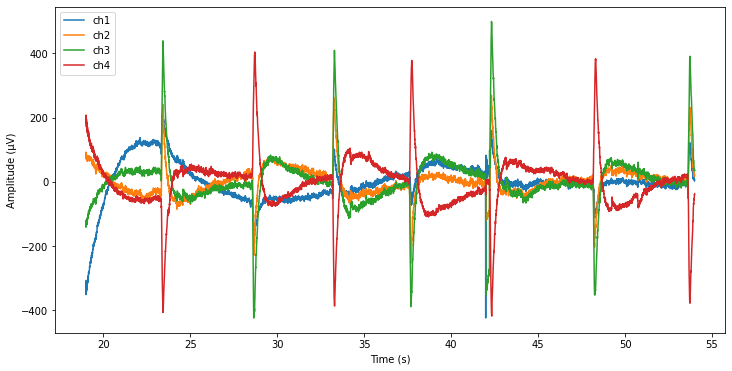

In [10]:
data = pd.read_csv('hands-free-drone-master/data/OpenBCISession_eye_movement_test_left/OpenBCI-RAW-2020-03-14_12-00-17.txt',
                   header = 6,
                   names = ['sampleIdx','ch1','ch2','ch3','ch4','accel1','accel2','accel3','timeFormatted','time'])
# at the moment, timeFormatted is not important and is not well formatted, 
# as well as sampleIdx and accelerometer data, so we can delete it.
data = data.drop(["sampleIdx","timeFormatted", "accel1", "accel2", "accel3"],axis=1)

# reorder dataframe
data = data[['time', 'ch1', 'ch2', 'ch3', 'ch4']]

# number of samples
N = len(data['time']) 

# sampling frequency (Hz)
fs = 200.0 

# sampling period (seconds)
T = 1.0 / fs 

#data.loc[0:1]
from datetime import datetime, timedelta

startTime = (data['time'].loc[0]).astype(np.float64)
stopTime = (startTime + N*T)
time = np.linspace(startTime, stopTime, N)
time = np.around(time, decimals=3)

startFromZero = True

if (startFromZero):
    time = time - round(startTime,3)
    time = np.around(time, decimals=3)
    data['time'] = time
    #timeFormatted = datetime.fromtimestamp(time / 1000).strftime('%H:%M:%S.%f')
    # rawData['timeFormatted'] = timeFormatted
else:
    data['time'] = time

# Print first 2 samples
#data.loc[0:1]
data = data[(data['time']>19) & (data['time']<54) ]
# Required input defintions are as follows;
# time:   Time between samples
# band:   The bandwidth around the centerline freqency that you wish to filter
# freq:   The centerline frequency to be filtered
# ripple: The maximum passband ripple that is allowed in db
# order:  The filter order.  For FIR notch filters this is best set to 2 or 3,
#         IIR filters are best suited for high values of order.  This algorithm
#         is hard coded to FIR filters
# filter_type: 'butter', 'bessel', 'cheby1', 'cheby2', 'ellip'
# data:         the data to be filtered
from scipy.signal import iirfilter, butter, lfilter
def notch_filter(time, band, freq, ripple, order, filter_type, data):
    from scipy.signal import iirfilter, lfilter
    fs   = 1/time
    nyq  = fs/2.0
    low  = freq - band/2.0
    high = freq + band/2.0
    low  = low/nyq
    high = high/nyq
    b, a = iirfilter(order, [low, high], rp=ripple, btype='bandstop',
                     analog=False, ftype=filter_type)
    filtered_data = lfilter(b, a, data)
    return filtered_data

def butter_bandpass(lowcut, highcut, fs, order=5):
    nyq = 0.5 * fs
    low = lowcut / nyq
    high = highcut / nyq
    b, a = butter(order, [low, high], btype='band')
    return b, a

def butter_bandpass_filter(data, lowcut, highcut, fs, order=5):

    b, a = butter_bandpass(lowcut, highcut, fs, order=order)
    y = lfilter(b, a, data)
    return y

#filtData = notch_filter(1/200.0, 1.0, 50.0, 0.5, 2.0, 'butter', data['ch3'])
filtData = pd.DataFrame()
filtData['time'] = data['time']
filtData['ch1'] = butter_bandpass_filter(data['ch1'],0.05,99,200)
filtData['ch1'] = notch_filter(1/200.0, 0.1, 50.0, 0.5, 2.0, 'butter', filtData['ch1'])
filtData['ch2'] = butter_bandpass_filter(data['ch2'],0.05,99,200)
filtData['ch2'] = notch_filter(1/200.0, 0.1, 50.0, 0.5, 2.0, 'butter', filtData['ch2'])
filtData['ch3'] = butter_bandpass_filter(data['ch3'],0.05,99,200)
filtData['ch3'] = notch_filter(1/200.0, 0.1, 50.0, 0.5, 2.0, 'butter', filtData['ch3'])
filtData['ch4'] = butter_bandpass_filter(data['ch4'],0.05,99,200)
filtData['ch4'] = notch_filter(1/200.0, 0.1, 50.0, 0.5, 2.0, 'butter', filtData['ch4'])

plt.figure(figsize=(12, 6))

#plt.subplot(2, 2, 1)
#plt.plot(data['time'], data['ch1'])
#plt.plot(data['time'], data['ch2'])
#plt.plot(data['time'], data['ch3']-200)
#plt.plot(data['time'], data['ch4']-200)


#plt.subplot(2, 2, 2)
plt.plot(filtData['time'], filtData['ch1'], label='ch1')
plt.plot(filtData['time'], filtData['ch2'], label='ch2')
plt.plot(filtData['time'], filtData['ch3'], label='ch3')
plt.plot(filtData['time'], filtData['ch4'], label='ch4')

#plt.plot(filtData['time'], filtData['ch2'])
#plt.subplot(4, 1, 3)
#plt.plot(filtData['time'], filtData['ch3'])
#plt.subplot(4, 1, 4)
#plt.plot(filtData['time'], filtData['ch4'])
ax = plt.gca()
ax.legend()
#ax.set_ylim(-75,75)
plt.ylabel('Amplitude (\u03BCV)')
plt.xlabel('Time (s)')
plt.show()

In [11]:
left  = filtData

# RIGHT

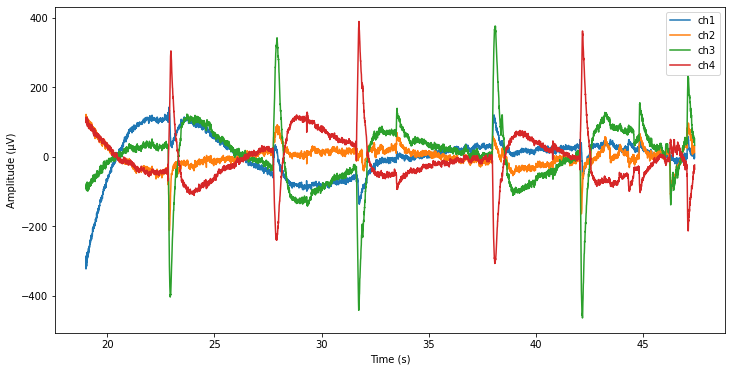

In [12]:
data = pd.read_csv('hands-free-drone-master/data/OpenBCISession_eye_movement_test_right/OpenBCI-RAW-2020-03-14_12-15-52.txt',
                   header = 6,
                   names = ['sampleIdx','ch1','ch2','ch3','ch4','accel1','accel2','accel3','timeFormatted','time'])
# at the moment, timeFormatted is not important and is not well formatted, 
# as well as sampleIdx and accelerometer data, so we can delete it.
data = data.drop(["sampleIdx","timeFormatted", "accel1", "accel2", "accel3"],axis=1)

# reorder dataframe
data = data[['time', 'ch1', 'ch2', 'ch3', 'ch4']]

# number of samples
N = len(data['time']) 

# sampling frequency (Hz)
fs = 200.0 

# sampling period (seconds)
T = 1.0 / fs 

#data.loc[0:1]
from datetime import datetime, timedelta

startTime = (data['time'].loc[0]).astype(np.float64)
stopTime = (startTime + N*T)
time = np.linspace(startTime, stopTime, N)
time = np.around(time, decimals=3)

startFromZero = True

if (startFromZero):
    time = time - round(startTime,3)
    time = np.around(time, decimals=3)
    data['time'] = time
    #timeFormatted = datetime.fromtimestamp(time / 1000).strftime('%H:%M:%S.%f')
    # rawData['timeFormatted'] = timeFormatted
else:
    data['time'] = time

# Print first 2 samples
#data.loc[0:1]
data = data[(data['time']>19) & (data['time']<54) ]
# Required input defintions are as follows;
# time:   Time between samples
# band:   The bandwidth around the centerline freqency that you wish to filter
# freq:   The centerline frequency to be filtered
# ripple: The maximum passband ripple that is allowed in db
# order:  The filter order.  For FIR notch filters this is best set to 2 or 3,
#         IIR filters are best suited for high values of order.  This algorithm
#         is hard coded to FIR filters
# filter_type: 'butter', 'bessel', 'cheby1', 'cheby2', 'ellip'
# data:         the data to be filtered
from scipy.signal import iirfilter, butter, lfilter
def notch_filter(time, band, freq, ripple, order, filter_type, data):
    from scipy.signal import iirfilter, lfilter
    fs   = 1/time
    nyq  = fs/2.0
    low  = freq - band/2.0
    high = freq + band/2.0
    low  = low/nyq
    high = high/nyq
    b, a = iirfilter(order, [low, high], rp=ripple, btype='bandstop',
                     analog=False, ftype=filter_type)
    filtered_data = lfilter(b, a, data)
    return filtered_data

def butter_bandpass(lowcut, highcut, fs, order=5):
    nyq = 0.5 * fs
    low = lowcut / nyq
    high = highcut / nyq
    b, a = butter(order, [low, high], btype='band')
    return b, a

def butter_bandpass_filter(data, lowcut, highcut, fs, order=5):

    b, a = butter_bandpass(lowcut, highcut, fs, order=order)
    y = lfilter(b, a, data)
    return y

#filtData = notch_filter(1/200.0, 1.0, 50.0, 0.5, 2.0, 'butter', data['ch3'])
filtData = pd.DataFrame()
filtData['time'] = data['time']
filtData['ch1'] = butter_bandpass_filter(data['ch1'],0.05,99,200)
filtData['ch1'] = notch_filter(1/200.0, 0.1, 50.0, 0.5, 2.0, 'butter', filtData['ch1'])
filtData['ch2'] = butter_bandpass_filter(data['ch2'],0.05,99,200)
filtData['ch2'] = notch_filter(1/200.0, 0.1, 50.0, 0.5, 2.0, 'butter', filtData['ch2'])
filtData['ch3'] = butter_bandpass_filter(data['ch3'],0.05,99,200)
filtData['ch3'] = notch_filter(1/200.0, 0.1, 50.0, 0.5, 2.0, 'butter', filtData['ch3'])
filtData['ch4'] = butter_bandpass_filter(data['ch4'],0.05,99,200)
filtData['ch4'] = notch_filter(1/200.0, 0.1, 50.0, 0.5, 2.0, 'butter', filtData['ch4'])

plt.figure(figsize=(12, 6))

#plt.subplot(2, 2, 1)
#plt.plot(data['time'], data['ch1'])
#plt.plot(data['time'], data['ch2'])
#plt.plot(data['time'], data['ch3']-200)
#plt.plot(data['time'], data['ch4']-200)


#plt.subplot(2, 2, 2)
plt.plot(filtData['time'], filtData['ch1'], label='ch1')
plt.plot(filtData['time'], filtData['ch2'], label='ch2')
plt.plot(filtData['time'], filtData['ch3'], label='ch3')
plt.plot(filtData['time'], filtData['ch4'], label='ch4')

#plt.plot(filtData['time'], filtData['ch2'])
#plt.subplot(4, 1, 3)
#plt.plot(filtData['time'], filtData['ch3'])
#plt.subplot(4, 1, 4)
#plt.plot(filtData['time'], filtData['ch4'])
ax = plt.gca()
ax.legend()
#ax.set_ylim(-75,75)
plt.ylabel('Amplitude (\u03BCV)')
plt.xlabel('Time (s)')
plt.show()

In [13]:
right = filtData

In [14]:
array_ch1_up = pd.array(up["ch1"]).to_numpy()
array_ch2_up = pd.array(up["ch2"]).to_numpy()
array_ch3_up = pd.array(up["ch3"]).to_numpy()
array_ch4_up = pd.array(up["ch4"]).to_numpy()

In [15]:
array_ch1_down = pd.array(down["ch1"]).to_numpy()
array_ch2_down = pd.array(down["ch2"]).to_numpy()
array_ch3_down = pd.array(down["ch3"]).to_numpy()
array_ch4_down = pd.array(down["ch4"]).to_numpy()

In [16]:
array_ch1_left = pd.array(left["ch1"]).to_numpy()
array_ch2_left = pd.array(left["ch2"]).to_numpy()
array_ch3_left = pd.array(left["ch3"]).to_numpy()
array_ch4_left = pd.array(left["ch4"]).to_numpy()

In [17]:
array_ch1_right = pd.array(right["ch1"]).to_numpy()
array_ch2_right = pd.array(right["ch2"]).to_numpy()
array_ch3_right = pd.array(right["ch3"]).to_numpy()
array_ch4_right = pd.array(right["ch4"]).to_numpy()

In [19]:
up = np.array([array_ch1_up, array_ch2_up,array_ch3_up, array_ch4_up])
down = np.array([array_ch1_down, array_ch2_down,array_ch3_down, array_ch4_down])
left = np.array([array_ch1_left, array_ch2_left,array_ch3_left, array_ch4_left])
right = np.array([array_ch1_right, array_ch2_right,array_ch3_right, array_ch4_right])

In [35]:
max_values = []
for array in up:
    value = array.min()
    max_values.append(value)
channel = max_values.index(min(max_values))
print(channel+1)

2


In [36]:
max_values = []
for array in down:
    value = array.min()
    max_values.append(value)
channel = max_values.index(min(max_values))
print(channel+1)

2


In [37]:
max_values = []
for array in left:
    value = array.min()
    max_values.append(value)
print(max_values)
channel = max_values.index(min(max_values))
print(channel+1)

[-423.7892183790891, -253.77215707730886, -423.9270259003676, -418.0672775817949]
3


In [38]:
max_values = []
for array in right:
    value = array.min()
    max_values.append(value)
channel = max_values.index(min(max_values))
print(channel+1)

3
